# Incicio de proyecto

Iniciamos el proyecto importando las librerías necesarias y el dataset elegido.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Empezamos con la limpieza y modelado del dataset para poder proyectar el análisis.

In [2]:
soypriproy = pd.read_excel("soja-1ra-serie-2000-2019.xlsx")
#Creamos así la variable que vamos a utilizar para hacer el análisis en el proyecto
soypriproy.head()

,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
0,soja 1ra,2000,2000/01,Buenos Aires,6,Adolfo Alsina,6007.0,19800,19800,32900,1662
1,soja 1ra,2000,2000/01,Buenos Aires,6,Adolfo Gonzales Chaves,6014.0,19500,19500,27300,1400
2,soja 1ra,2000,2000/01,Buenos Aires,6,Alberti,6021.0,9000,7200,20200,2806
3,soja 1ra,2000,2000/01,Buenos Aires,6,Ayacucho,6042.0,1500,1450,2200,1517
4,soja 1ra,2000,2000/01,Buenos Aires,6,Azul,6049.0,39000,38200,70700,1851


El Dataset elejido fue extraido de la página oficial de datos de agricultura de Argnentina (https://datos.magyp.gob.ar/dataset/soja-siembra-cosecha-produccion-rendimiento/archivo/60a9bb59-c37b-41a0-9ff0-47b94f92cd23)
De manera tal que podemos trabajar con datos verídicos de una fuente confiable. Apartir de estos datos se pasa a relaizar una predicción a futuro de los rindes de las siembras de soja de 1ª, el promedio por localidad y la cantidad de hectareas sembradas/cosechadas disponiendo así un objetivo.

In [3]:
soypriproy['rendimiento_kgxha'] = pd.to_numeric(soypriproy['rendimiento_kgxha'], errors='coerce')
soypriproy.head()
# Ésta línea de código fue necesaria para luego establecer en la gráfica ya que alguno de los datos no se leían como número y para hacer uso de los operadores matemáticos fue necesario modificarlo.

,cultivo_nombre,anio,campania,provincia_nombre,provincia_id,departamento_nombre,departamento_id,superficie_sembrada_ha,superficie_cosechada_ha,produccion_tm,rendimiento_kgxha
0,soja 1ra,2000,2000/01,Buenos Aires,6,Adolfo Alsina,6007.0,19800,19800,32900,1662.0
1,soja 1ra,2000,2000/01,Buenos Aires,6,Adolfo Gonzales Chaves,6014.0,19500,19500,27300,1400.0
2,soja 1ra,2000,2000/01,Buenos Aires,6,Alberti,6021.0,9000,7200,20200,2806.0
3,soja 1ra,2000,2000/01,Buenos Aires,6,Ayacucho,6042.0,1500,1450,2200,1517.0
4,soja 1ra,2000,2000/01,Buenos Aires,6,Azul,6049.0,39000,38200,70700,1851.0


La siguiente modificación del dataset original es para poder luego hacer una gráfica que muestra el rinde promedio de cada departamento.

In [4]:
rinde_localidad = soypriproy.groupby("departamento_nombre")["rendimiento_kgxha"].mean()
rinde_localidad.head()
#el método .mean() nos permite tener como resultado en los datos unificados (groupby) por departamento.

departamento_nombre
12 de Octubre    2113.000000
2 de Abril       2045.550000
25 de Mayo       2441.925926
9 de Julio       2566.566667
Adolfo Alsina    1916.200000
Name: rendimiento_kgxha, dtype: float64

# Gráficas

Primero vamos a mostrar una gráfica para tener ya visualizado los rindes promedio por hectarea en cada departamento individualmente.

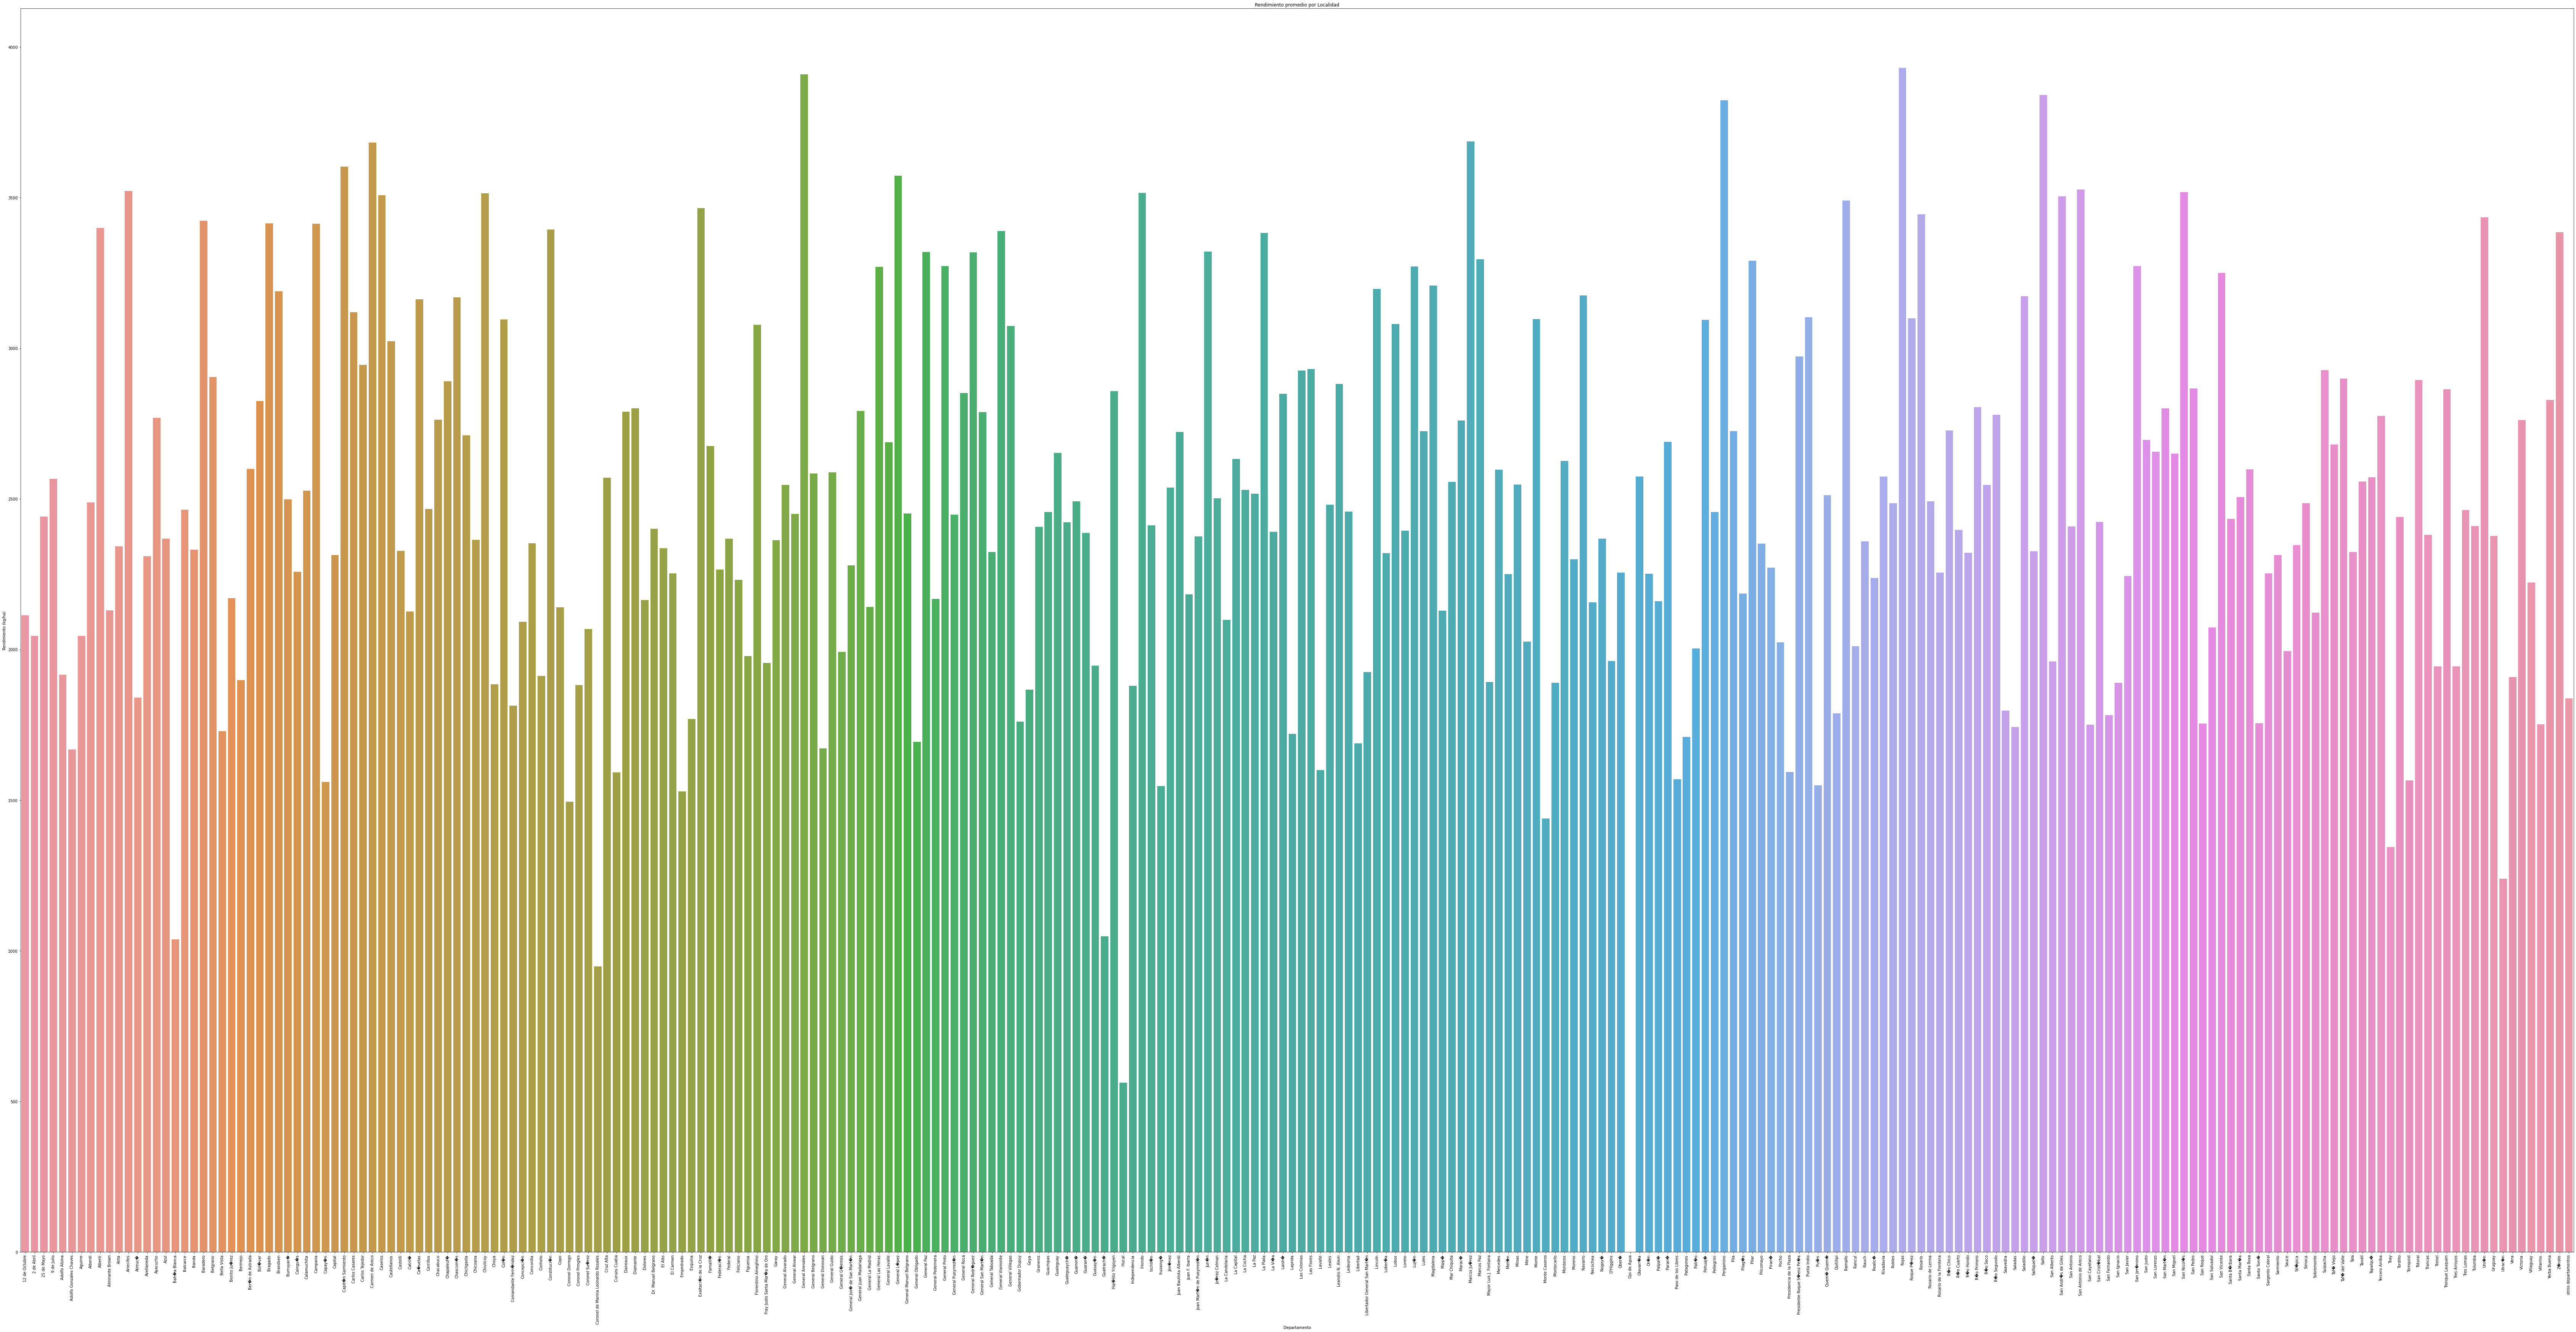

In [5]:
df_rinde_localidad = rinde_localidad.reset_index()


plt.figure(figsize=(120, 60))
sns.barplot(x="departamento_nombre", y="rendimiento_kgxha", data=df_rinde_localidad)
plt.title("Rendimiento promedio por Localidad")
plt.xlabel("Departamento")
plt.ylabel("Rendimiento (kg/ha)")
plt.xticks(rotation=90)


plt.show()

En segundo lugar vamos a estableces por gráficas los mejores resultados del promedio por hectárea que nos puede servir para proponer como aspiración u objetivo a futuro en las próximas cosechas.

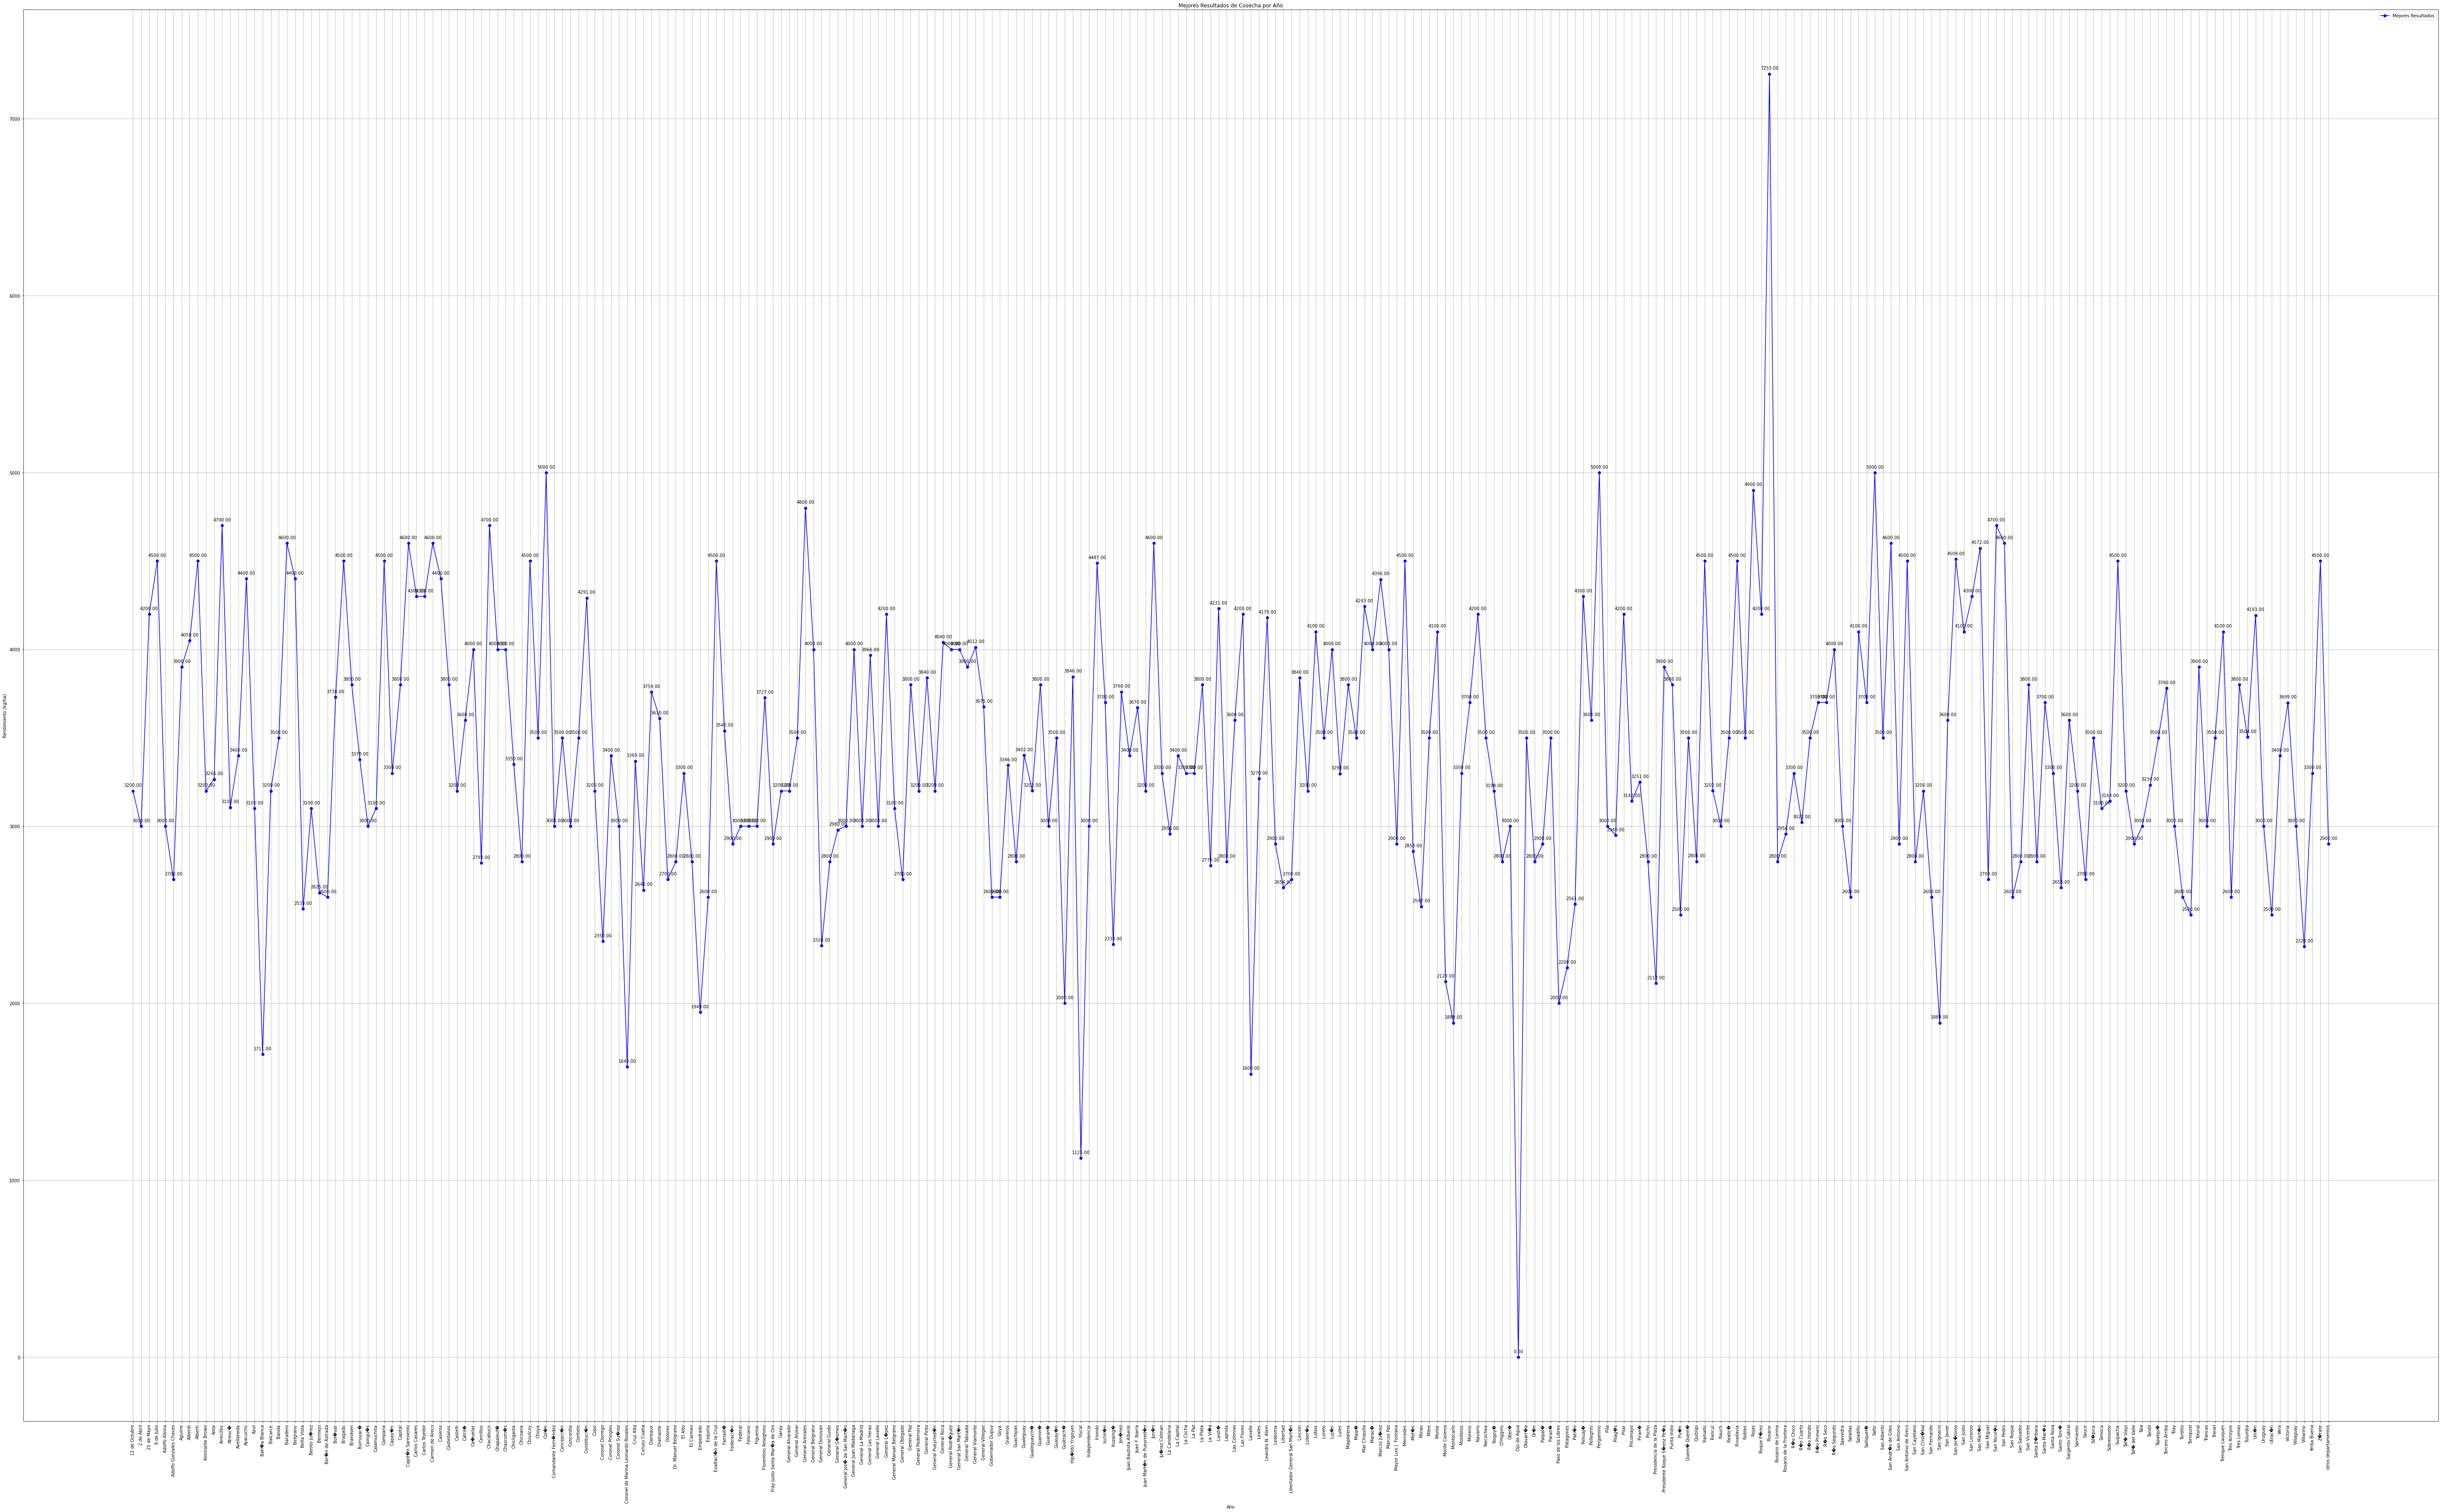

In [6]:
mejores_resultados = soypriproy.groupby("departamento_nombre")["rendimiento_kgxha"].max()


plt.figure(figsize=(100, 60))
plt.plot(mejores_resultados.index, mejores_resultados.values, marker='o', linestyle='-', color='blue', label='Mejores Resultados')
plt.title('Mejores Resultados de Cosecha por Año')
plt.xlabel('Año')
plt.ylabel('Rendimiento (kg/ha)')

# Particularmente se puede agragrar una linea de objetivo para poder visualizar en el resultado la propuesta a futuro
#objetivo = 1000
#plt.axhline(y=objetivo, color='red', linestyle='--', label='Objetivo')

# Etiqueta los puntos de datos para los mejores resultados
for i, valor in enumerate(mejores_resultados.values):
    plt.annotate(f'{valor:.2f}', (mejores_resultados.index[i], valor), textcoords="offset points", xytext=(0,10), ha='center')


plt.xticks(rotation=90)
plt.legend()


plt.grid(True)
plt.show()

Y por último se puede hacer también una gráfica de correlatividad entre el rinde promedio total anual y la diferencia entres la superficie sembrada y la cosechada. Se observa particularmente un año que fue muy significativa la forma en que se vio afectado el resultado esperado.

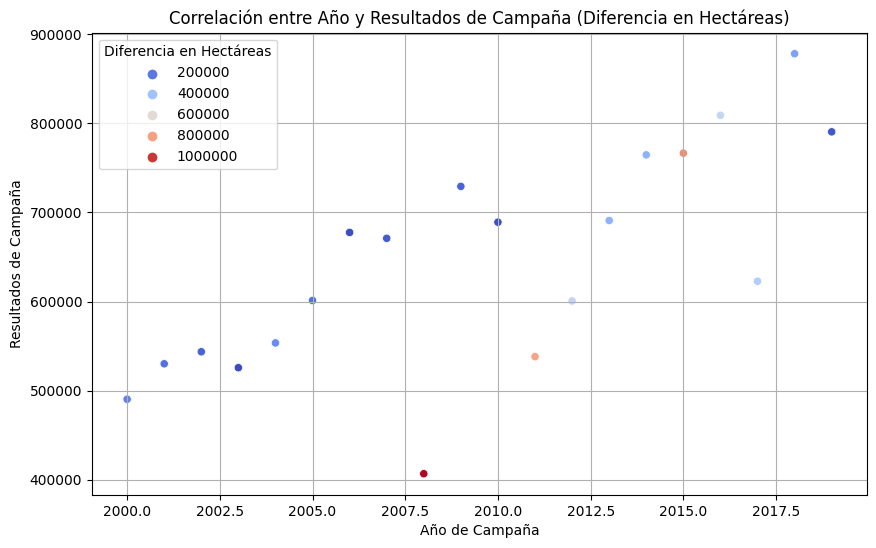

In [8]:
data_agrupada = soypriproy.groupby('anio').agg({
    'superficie_sembrada_ha': 'sum',
    'superficie_cosechada_ha': 'sum',
    'rendimiento_kgxha': 'sum'
}).reset_index()
#Usando el método de agregación en pandas .agg, creamos un nuevo dataset más específico para nuestro interés.

data_agrupada['diferencia_hectareas'] = data_agrupada['superficie_sembrada_ha'] - data_agrupada['superficie_cosechada_ha']


plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_agrupada, x='anio', y='rendimiento_kgxha', hue='diferencia_hectareas', palette='coolwarm')
plt.title('Correlación entre Año y Resultados de Campaña (Diferencia en Hectáreas)')
plt.xlabel('Año de Campaña')
plt.ylabel('Resultados de Campaña')
plt.legend(title='Diferencia en Hectáreas')


plt.grid(True)
plt.show()

Podemos realizar un análisis más detallado al observar la diferencia más significativa en un período de tiempo específico, contrastándolo con un índice de desarrollo en constante crecimiento. Al enfocarnos en un intervalo temporal particular, podemos identificar de manera más precisa los cambios y las tendencias que han surgido. Esto nos permite obtener una visión más matizada y detallada de la evolución del proyecto agropecuario, destacando los factores clave que han contribuido al éxito o que podrían necesitar ajustes estratégicos para futuras mejoras.